In [3]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
path = "/home/caffeinasw/Develop/Cursos/MachineLearning/Datasets/"
fileName = "PruebaDataset.txt"
fullPath = path + fileName

In [5]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S.%f')
data = pd.read_csv(fullPath, low_memory=False)
len(data)

1234350

In [6]:
data.head()

,Unnamed: 0,intLlaveSemanaAnualVenta,chrCodigoConsultora,intUnidadesVendidas_x,mnyCostoEstandarUSD_x,mnyVentaNetaUSD_x,chrCodigoProducto,vchDescripcionProducto_x,chrCodigoCategoria_x,vchDescripcionCategoria_x,...,mnyCostoVentaUSD,fltFactorPotencial,fltFactorReal,intNumeroPedidosTotal,vchDescripcionJoyaSKUPorSet,vchDescripcionJoyaEstrategiaCorp,mnyCostoVentaUnitarioML,mnyCostoVentaUnitarioUSD,vchDescripcionJoyaPricing,vchDescripcion_N_R_I
0,0,20160312,10,1,4.47,11.56,25025212,ARETES ROJO TRAVIESO J11001,5,JOYERIA,...,13293.0,0.044119,0.044119,100432,0,NO EXISTE,3.0,3.0,LOW,NUEVO
1,1,20160312,10,1,4.47,11.56,25025212,ARETES ROJO TRAVIESO J11001,5,JOYERIA,...,13293.0,0.044119,0.044119,100432,0,NO EXISTE,3.0,3.0,LOW,NUEVO
2,2,20160312,10,1,4.47,11.56,25025212,ARETES ROJO TRAVIESO J11001,5,JOYERIA,...,270.0,0.000982,0.000982,91678,0,NO EXISTE,3.0,3.0,LOW,REPEAT
3,3,20160312,10,1,4.47,11.56,25025212,ARETES ROJO TRAVIESO J11001,5,JOYERIA,...,270.0,0.000982,0.000982,91678,0,NO EXISTE,3.0,3.0,LOW,REPEAT
4,4,20160312,10,1,4.47,11.56,25025212,ARETES ROJO TRAVIESO J11001,5,JOYERIA,...,90.0,0.000306,0.000306,97956,0,NO EXISTE,3.0,3.0,LOW,INVENTARIO


In [7]:
dataset = data[['dtmFechaFacturacionPedido','intUnidadesVendidasCabecera','vchDescripcionProducto_x']]

In [8]:
#dataset['year'] = pd.DatetimeIndex(dataset.dtmFechaFacturacionPedido).year
#dataset['month'] = pd.DatetimeIndex(dataset.dtmFechaFacturacionPedido).month
# create a new column, date_parsed, with the parsed dates
#landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = "%m/%d/%y")
dataset['date'] = pd.to_datetime(dataset['dtmFechaFacturacionPedido'], format = "%Y-%m-%d %H:%M:%S.%f")
dataset['product'] = dataset['vchDescripcionProducto_x']
dataset['quantity'] = dataset['intUnidadesVendidasCabecera']
df = dataset[['date', 'product', 'quantity']]

In [9]:
df.dtypes

date        datetime64[ns]
product             object
quantity             int64
dtype: object

In [10]:
## cambiar formato de fecha a datetime64 para poderlo indexar
df['date'] = df.date.apply(lambda x: pd.to_datetime(x, format = "%Y-%m-%d"))

In [11]:
df.dtypes

date        datetime64[ns]
product             object
quantity             int64
dtype: object

In [67]:
# agrupar por  fecha
#df_grouped = df.groupby(['date'])['quantity'].sum().reset_index()
df_grouped = df.groupby(['date', 'product'])['quantity'].sum().reset_index()
df_grouped.head()

,date,product,quantity
0,2016-01-05 13:12:22,ARETES FLOR BLU AJ12762,48
1,2016-01-05 13:12:22,ARETES LONDON ROCK J12102,48
2,2016-01-05 13:12:23,SET ARETES PLATA Y RUBI J11350,126
3,2016-01-05 13:12:27,ARETES ILUSIONADA J11523,48
4,2016-01-05 13:12:27,ARETES LEYENDA CRISTAL J12764,36


In [68]:
# Indexar con date
df_grouped = df_grouped.set_index('date')
df_grouped.index

DatetimeIndex(['2016-01-05 13:12:22', '2016-01-05 13:12:22',
               '2016-01-05 13:12:23', '2016-01-05 13:12:27',
               '2016-01-05 13:12:27', '2016-01-05 13:12:45',
               '2016-01-05 13:12:51', '2016-01-05 13:12:51',
               '2016-01-05 13:12:53', '2016-01-05 13:12:53',
               ...
               '2017-12-29 13:18:19', '2017-12-29 13:21:57',
               '2017-12-29 13:22:26', '2017-12-29 13:22:36',
               '2017-12-29 14:00:02', '2017-12-29 14:01:00',
               '2017-12-29 14:01:26', '2017-12-29 14:05:38',
               '2017-12-29 15:09:57', '2017-12-29 15:11:07'],
              dtype='datetime64[ns]', name='date', length=431281, freq=None)

In [69]:
df_grouped.head()

,product,quantity
date,,
2016-01-05 13:12:22,ARETES FLOR BLU AJ12762,48
2016-01-05 13:12:22,ARETES LONDON ROCK J12102,48
2016-01-05 13:12:23,SET ARETES PLATA Y RUBI J11350,126
2016-01-05 13:12:27,ARETES ILUSIONADA J11523,48
2016-01-05 13:12:27,ARETES LEYENDA CRISTAL J12764,36


In [58]:
y = df_grouped[['quantity']].resample('MS').mean()

In [59]:
y['2016':]

,quantity
date,
2016-01-01,152.559474
2016-02-01,142.355413
2016-03-01,131.545707
2016-04-01,87.300021
2016-05-01,114.778119
2016-06-01,111.374199
2016-07-01,79.486471
2016-08-01,74.267940
2016-09-01,59.462267


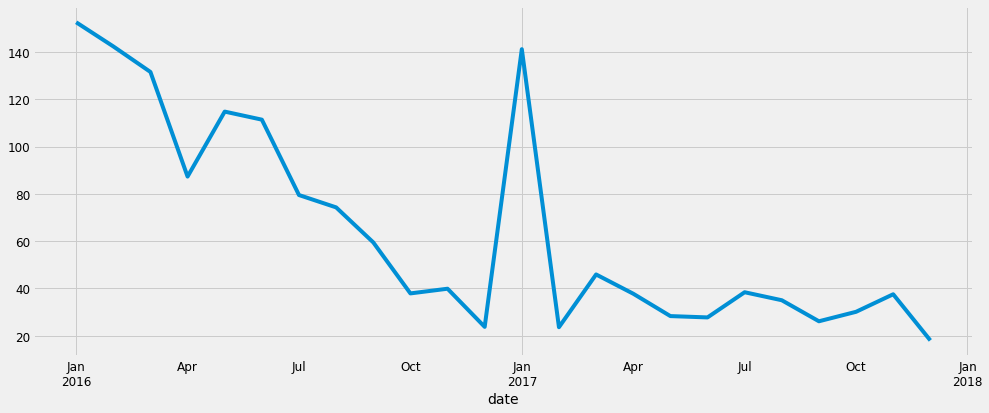

In [17]:
y.plot(figsize = (15, 6))
plt.show()

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

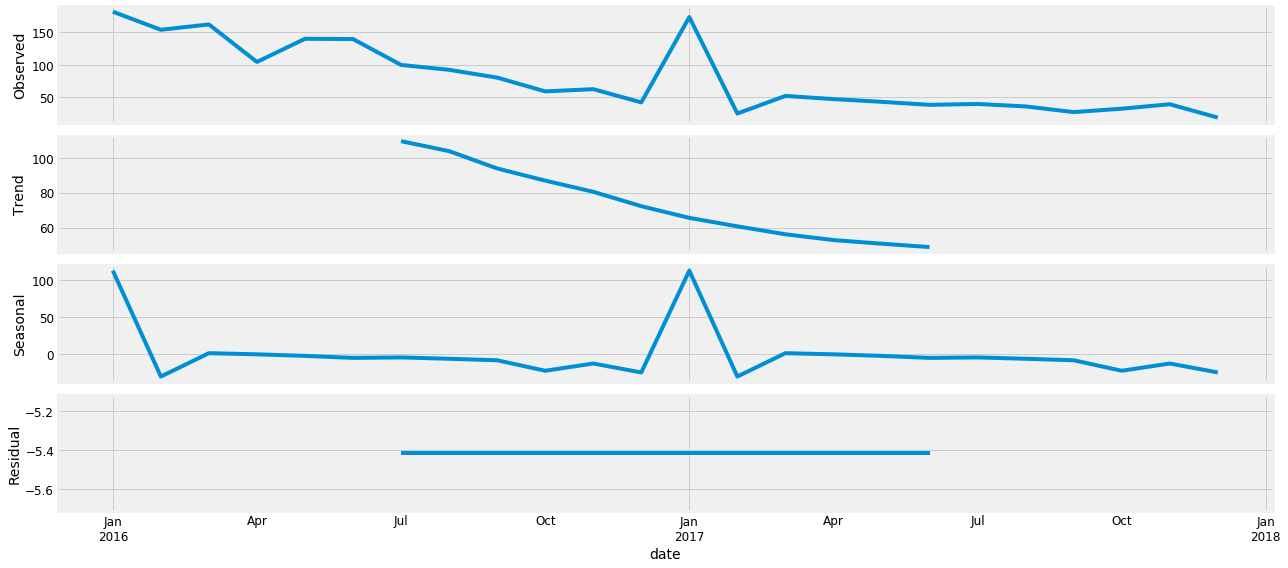

In [18]:
# Time-series decomposition (trend, seasonal and noise)
decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

In [19]:
# ARIMA (Autoregressive Integrated Moving Average), time series forecasting
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [20]:
# selección de parámetros para el modelo de Time Series
print('Ejemplos de combinaciones de parámetros para Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Ejemplos de combinaciones de parámetros para Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [21]:
# usamos un "grid search" para encontrar un set óptimo 
# de parámetros para alcanzar el mejor performance del modelo
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False, enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:288.23260240502566
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:138.76432293941906
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:281.96916279800064
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:277.38837354061695
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:129.49939810309166
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:270.09083946319504
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:243.20985655880284
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:116.58377460403163
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:243.82780671132463
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:235.62595429060656
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:116.45633450068937
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:235.52094248593295
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:256.4787237203713
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:127.96440985476136
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:255.2889085917518
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:249.8097012290078
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:126.73663262708283
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:249.9518825664

In [22]:
# Fitting the ARIMA model (+1, +x, 0, x)
mod = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                               seasonal_order = (0, 1, 0, 12),
                               enforce_stationary = False,
                               enforce_invertibility = False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2121      0.372     -0.570      0.568      -0.941       0.517
ma.L1          1.0000      0.371      2.695      0.007       0.273       1.727
sigma2      1299.1316      0.000   4.55e+06      0.000    1299.131    1299.132


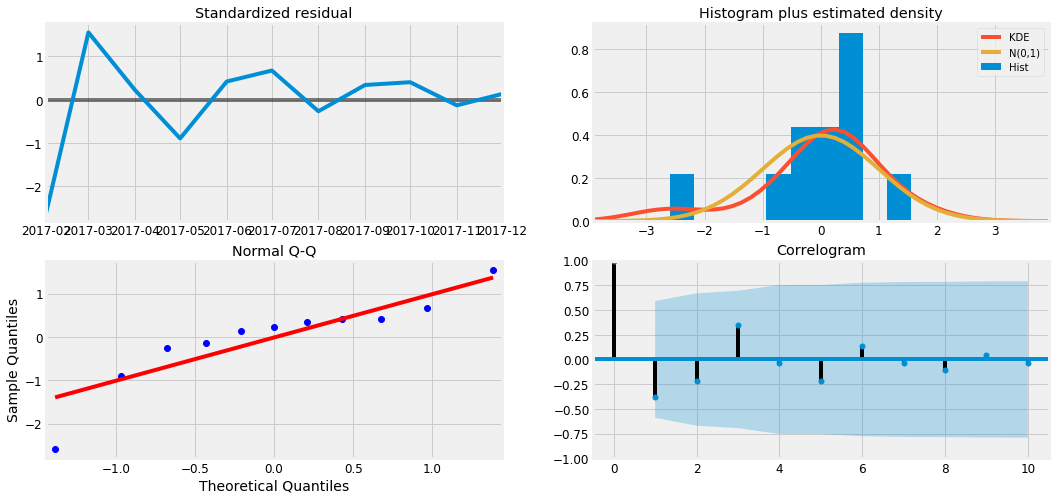

In [23]:
# diagnostico del modelo, para descubrir comportamiento inusual
results.plot_diagnostics(figsize=(16, 8))
plt.show()

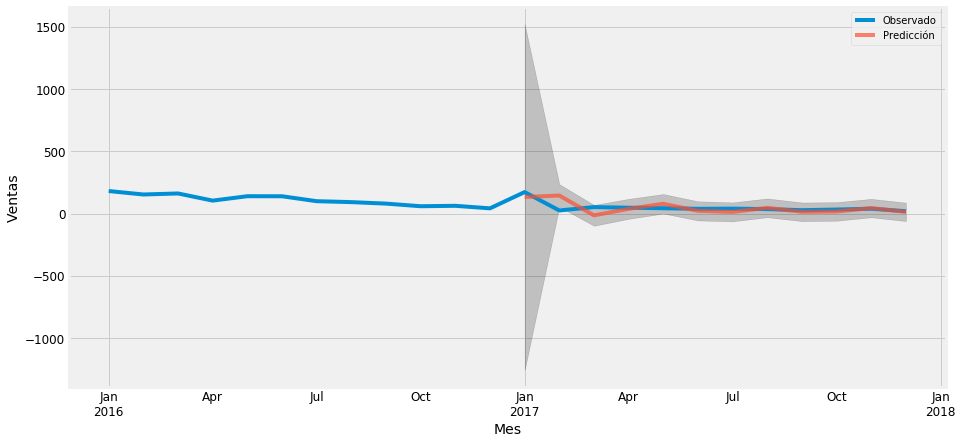

In [24]:
# Validatin Forecasts
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dinamic = False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label = 'Observado')
pred.predicted_mean.plot(ax = ax, label = 'Predicción', alpha = .7, figsize = (14,7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .2)
ax.set_xlabel('Mes')
ax.set_ylabel('Ventas')
plt.legend()
plt.show()

In [25]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('La media del error cuadrático es {}'.format(round(mse, 2)))

La media del error cuadrático es 1937.43


In [26]:
print('La raiz del error cuadrático es {}'.format(round(np.sqrt(mse), 2)))

La raiz del error cuadrático es 44.02


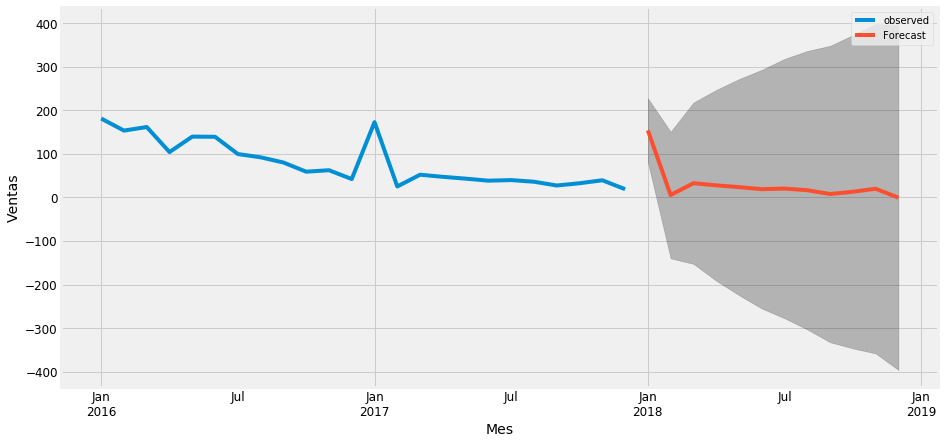

In [27]:
# Produciendo y visualizando el pronóstico
pred_uc = results.get_forecast(steps = 12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .25)
ax.set_xlabel('Mes')
ax.set_ylabel('Ventas')
plt.legend()
plt.show()

In [14]:
# Modelandolo con Prophet (facebook)
from fbprophet import Prophet
furniture = df_grouped

In [ ]:
furniture = furniture.rename(columns={'date': 'ds', 'quantity': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)
furniture_forecast = furniture_model.make_future_dataframe(periods=12, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Mes', ylabel = 'Ventas')
plt.title('Ventas');

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
